
✅ Data Loaded from CSV and SQL Database:
      Category Region  Revenue   Cost  Discount
0  Electronics  North    20000  12000         5
1     Clothing  South    15000   7000        10
2    Furniture   East    18000   9000         7
3  Electronics   West    25000  14000         6
4     Clothing  North    12000   6000         8

✅ After Adding Calculations:
      Category Region  Revenue   Cost  Discount  Profit
0  Electronics  North    20000  12000         5    8000
1     Clothing  South    15000   7000        10    8000
2    Furniture   East    18000   9000         7    9000
3  Electronics   West    25000  14000         6   11000
4     Clothing  North    12000   6000         8    6000
5    Furniture  South    16000   8000         9    8000


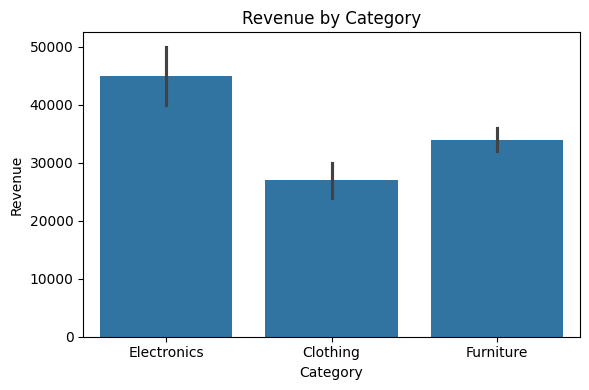

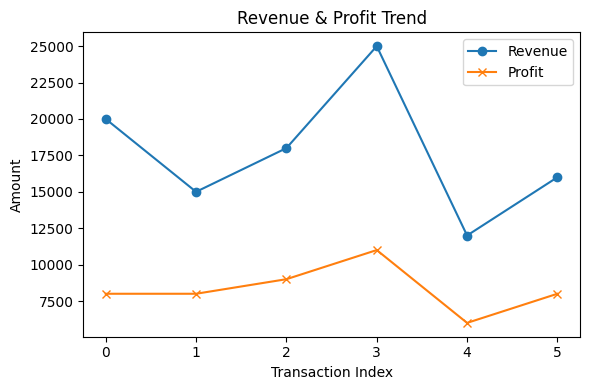

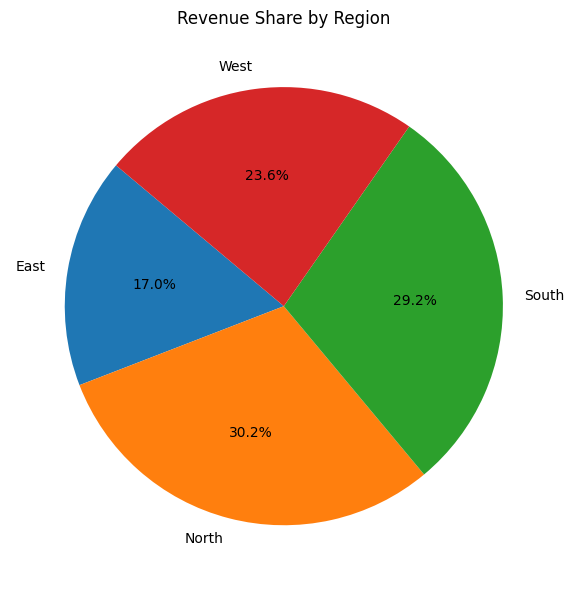


📊 RESULTS:
Total Sales: ₹106000
Average Discount: 7.50%


In [1]:
# DATA VISUALIZATION SIMULATION OF POWER BI & TABLEAU
# USING PYTHON (Pandas, Matplotlib, Seaborn, Plotly)
# ---------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlite3

# ---------------------------------------------------
# STEP 1: CONNECT TO DATA SOURCES
# ---------------------------------------------------

# Example: CSV/Excel-like data
csv_data = pd.DataFrame({
    "Category": ["Electronics", "Clothing", "Furniture", "Electronics", "Clothing", "Furniture"],
    "Region": ["North", "South", "East", "West", "North", "South"],
    "Revenue": [20000, 15000, 18000, 25000, 12000, 16000],
    "Cost": [12000, 7000, 9000, 14000, 6000, 8000],
    "Discount": [5, 10, 7, 6, 8, 9]
})

# Save as CSV
csv_data.to_csv("sales_data.csv", index=False)

# Load dataset from CSV
df_csv = pd.read_csv("sales_data.csv")

# Example: SQL Database
conn = sqlite3.connect(":memory:")  # In-memory DB
df_csv.to_sql("Sales", conn, index=False, if_exists="replace")
df_sql = pd.read_sql("SELECT * FROM Sales", conn)

print("\n✅ Data Loaded from CSV and SQL Database:")
print(df_sql.head())

# ---------------------------------------------------
# STEP 2: CREATE CALCULATED COLUMNS / MEASURES
# ---------------------------------------------------

df_csv["Profit"] = df_csv["Revenue"] - df_csv["Cost"]  # Calculated column
total_sales = df_csv["Revenue"].sum()                  # Measure
avg_discount = df_csv["Discount"].mean()               # Measure

print("\n✅ After Adding Calculations:")
print(df_csv)

# ---------------------------------------------------
# STEP 3: BASIC VISUALIZATIONS (Matplotlib & Seaborn)
# ---------------------------------------------------

# Bar Chart - Revenue by Category
plt.figure(figsize=(6, 4))
sns.barplot(x="Category", y="Revenue", data=df_csv, estimator=sum)
plt.title("Revenue by Category")
plt.tight_layout()
plt.show()

# Line Chart - Revenue and Profit Trend
plt.figure(figsize=(6, 4))
plt.plot(df_csv.index, df_csv["Revenue"], marker='o', label="Revenue")
plt.plot(df_csv.index, df_csv["Profit"], marker='x', label="Profit")
plt.title("Revenue & Profit Trend")
plt.xlabel("Transaction Index")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

# Pie Chart - Market Share by Region
region_share = df_csv.groupby("Region")["Revenue"].sum()
plt.figure(figsize=(6, 6))
plt.pie(region_share, labels=region_share.index, autopct="%1.1f%%", startangle=140)
plt.title("Revenue Share by Region")
plt.tight_layout()
plt.show()

# ---------------------------------------------------
# STEP 4: INTERACTIVE DASHBOARD (Plotly)
# ---------------------------------------------------

fig1 = px.bar(df_csv, x="Category", y="Revenue", color="Region",
              title="Revenue by Category and Region")

fig2 = px.line(df_csv, x=df_csv.index, y="Revenue", markers=True,
               title="Revenue Trend")

fig3 = px.pie(df_csv, values="Revenue", names="Region",
              title="Revenue Share by Region")

# Show interactive plots
fig1.show()
fig2.show()
fig3.show()

# ---------------------------------------------------
# STEP 5: RESULTS
# ---------------------------------------------------
print("\n📊 RESULTS:")
print(f"Total Sales: ₹{total_sales}")
print(f"Average Discount: {avg_discount:.2f}%")
